In [1]:
from collections import Counter
import scipy as sp
from scipy import special
import numpy as np
import matplotlib.pyplot as plt

##

## <h2><center>$D^{m}_{j_1, \dots, j_i} = {m \choose j_1} { m-j_i \choose j_2} \dots { m-j_1\dots-j_{i-1} \choose j_i} a^{j_1}_{j_1} \dots a^{j_i}_{j_i}$</center></h2>

In [252]:
def partitions(n , I=1):
    """Enumerate all the integer parition of n"""
    yield (n,)
    for i in range(I, n//2 + 1):
        for p in partitions(n-i, i):
            yield (i,) + p
            
def convolution(m):
    if m == 0:
        def C_0(a_s, f_derivatives):
            assert len(a_s) == len(f_derivatives)
            return f_derivatives[0]
        return C_0
    ##############################
    parts = list(partitions(m))
    # Find the degeneracy of the integer per part
    degeneracies = [Counter(p) for p in parts]
    #print(degeneracies)
    # indices
    indices_seq = [[k for k in d.keys()]
                      for d in degeneracies]
    #print(indices_seq)
    # counts of degeneracies per part: j_1, j_2, ..., j_i 
    degeneracies_counts = [[v for v in d.values()]
                              for d in degeneracies]
    degeneracies_totals = [sum(d.values()) for d in degeneracies]
    #print(degeneracies_counts)
    #print(degeneracies_totals)
    # decreasing sequence of m, m-j_1, ..., m-j_1-...-j_{i-1}  
    dec_seq = [[totals-sum(p[:i]) for i,v in enumerate(p)]
                   for p, totals in zip(degeneracies_counts,degeneracies_totals)]
    #print(dec_seq)
    # Find combinations per  part   
    comb_m_seq = [[special.comb(s, j, exact=True) for s,j in zip(seq, counts)]
                for seq, counts in zip(dec_seq, degeneracies_counts)]
    #print(comb_m_seq)
    comb_m_seq = [np.prod(p) for p in comb_m_seq]
    #print(comb_m_seq)
    # Combine all to make ( binomial coefs,derivative_order , list_of_indice, degenerecies )
    D_m_seq = [(bino_coef, derivative_order, indices, term_deg)
                for bino_coef, derivative_order , indices, term_deg in zip(comb_m_seq, degeneracies_totals, indices_seq, degeneracies_counts)]
    #print(D_m_seq)
    #m_factorial = sp.special.factorial(m, exact=True)
    
    def C_m(a_s, f_derivatives):
        assert(len(a_s) == len(f_derivatives))
        ret = [((bino_coef *  np.prod([ a_s[i]**j for i , j in zip(indices, term_deg)]))
                   * f_derivatives[d_order] / special.factorial(d_order, exact=True))                                
                 for bino_coef, d_order , indices, term_deg in D_m_seq]
        return ret
    
    return C_m


def composition(n, a_s, derivative_funcs):
    #assert n+1 == len(derivative_funcs)
    #assert n+1 == len(a_s)    
    assert len(a_s) == len(derivative_funcs)
    C_s = [convolution(i) for i in range(n+1)]
    a_0 = a_s[0]
    derivative_values = [derivative_funcs[i](a_0) for i in range(n+1)]
    #print(n, derivative_values)
    #print([C_s[i](a_s[:i+1], derivative_values[:i+1]) for i in range(n+1)])
    #print([np.sum(C_s[i](a_s[:i+1], derivative_values[:i+1])) for i in range(n+1)])
    coefs = [np.sum(C_s[i](a_s[:i+1], derivative_values[:i+1])) for i in range(n+1)]
    def power_series(t):
        return np.sum([ (t ** i)*c for i, c in zip(range(n+1),coefs)])
    return power_series
        
        

In [3]:
r = composition(2, [1, 1, 1, 1], [lambda x: x+1]*4)
r(0)

2.0

In [261]:
f0 = lambda x: x
f1 = lambda x: 1
f2 = lambda x: 0
derivative_funcs = [f0, f1] + [f2]*10

g = lambda x: np.sin(x)
g1 = lambda x: np.cos(x)
g2 = lambda x: -np.sin(x)

g3 = lambda x: -np.cos(x)

derivative_funcs = [g, g1, g2, g3]*40


g = lambda x: np.sin(x)

a_s = [0, 1] + [0]*40



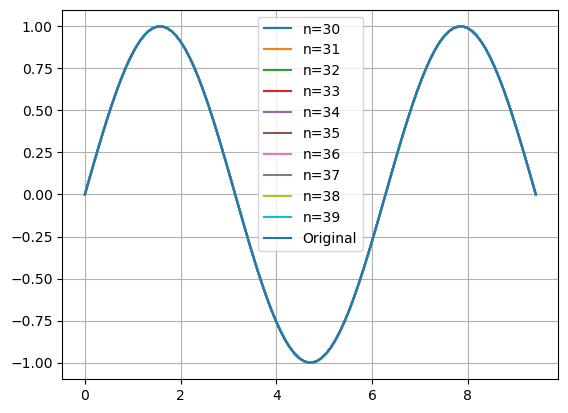

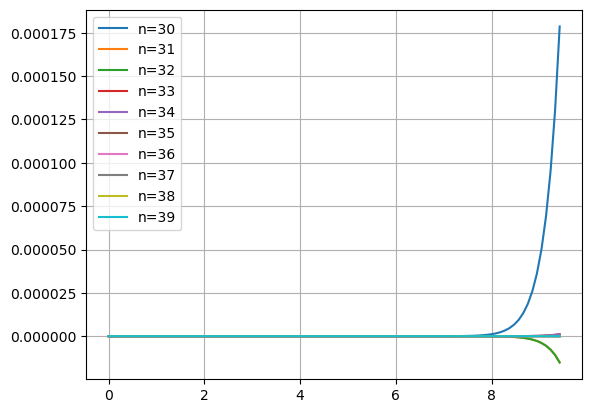

In [6]:
ts = np.linspace(0, 3*np.pi, 100)

for n in range(30,40):
    f_comp = composition(n, a_s[:n+1], derivative_funcs[:n+1])
    plt.plot(ts, [f_comp(t) for t in ts], label=f"n={n}")
    
plt.plot(ts, g(f0(ts)), label="Original")
plt.legend();plt.grid();plt.show()

for n in range(30,40):
    f_comp = composition(n, a_s[:n+1], derivative_funcs[:n+1])
    plt.plot(ts, [f_comp(t) for t in ts] - g(f0(ts)), label=f"n={n}")
    
plt.legend();plt.grid();plt.show()


In [353]:
1/6

0.16666666666666666

In [435]:
f0 = lambda x: np.sin(x)
f1 = lambda x: np.cos(x)
f2 = lambda x: -np.sin(x)
f3 = lambda x: -np.cos(x)

derivative_funcs = [f0, f1, f2, f3]*100
g = lambda x: 1/(1 - x)



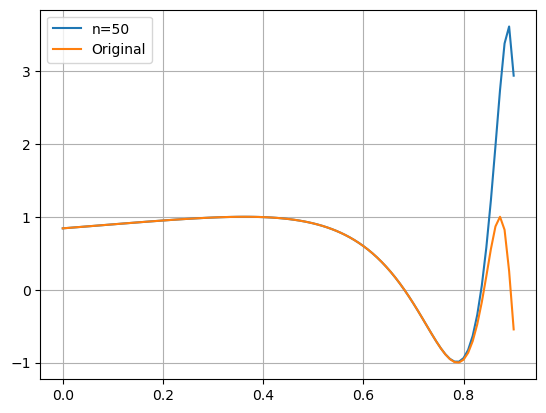

In [436]:
ts = np.linspace(0, .9, 100)

for n in range(50, 51):
    f_comp = composition(n, [1]*(n+1), derivative_funcs[:n+1])
    plt.plot(ts, [f_comp(t) for t in ts], label=f"n={n}")
    
plt.plot(ts, f0(g(ts)), label="Original")
plt.legend();plt.grid();plt.show()

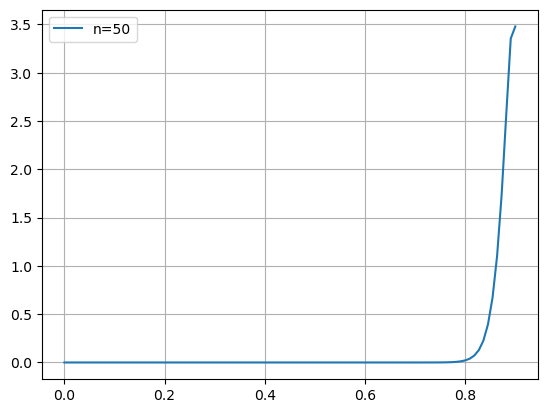

In [437]:
for n in range(50, 51):
    f_comp = composition(n, [1]*(n+1), derivative_funcs[:n+1])
    plt.plot(ts, [f_comp(t) for t in ts] - f0(g(ts)), label=f"n={n}")
    
plt.legend();plt.grid();plt.show()

In [234]:
f0(0)

0.0

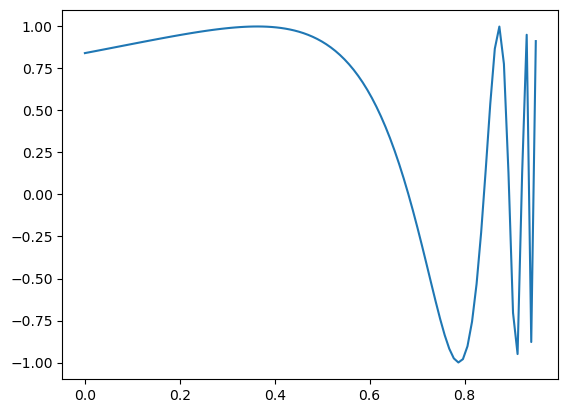

In [423]:
ts = np.linspace(0, .95, 100)
plt.plot(ts, f0(g(ts)))

In [4]:
import jax
from jax import jit

In [257]:
g = lambda x: 1/(1+(x/.5)**2)


n_max = 10
derivative_funcs = [jit(g)]
_ = derivative_funcs[-1](0.0)
for i in range(n_max):
    derivative_funcs.append(jax.grad(derivative_funcs[-1]))
    # spped up the compilation
    #_ = derivative_funcs[-1](0.0)
    
# speed up the compilation
#[g_m(0.0) for g_m in derivative_funcs]
    

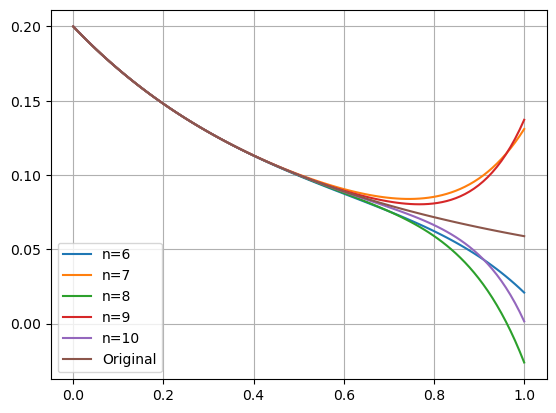

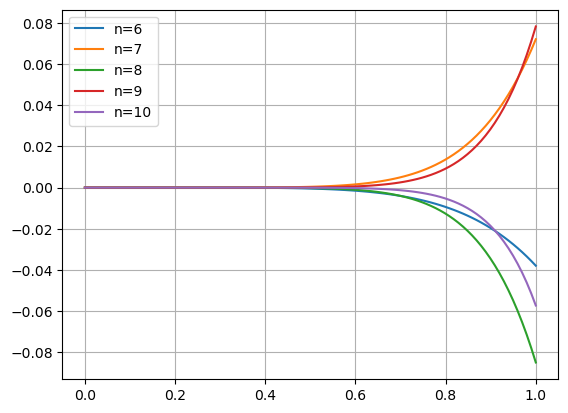

In [258]:
#a_s = [0.0, 1.0] + [0.0]*40
a_s = [1.0, 1.0] + [0.0]*40
f = lambda x: 1.0 + x

ts = np.linspace(0, 1, 100)
n_range = range(6,11)
for n in n_range:
    f_comp = composition(n, a_s[:n+1], derivative_funcs[:n+1])
    plt.plot(ts, [f_comp(t) for t in ts], label=f"n={n}")
    
plt.plot(ts, g(f(ts)), label="Original")
plt.legend();plt.grid();plt.show()

for n in n_range:
    f_comp = composition(n, a_s[:n+1], derivative_funcs[:n+1])
    plt.plot(ts, [f_comp(t) for t in ts] - g(f(ts)), label=f"n={n}")
    
plt.legend();plt.grid();plt.show()



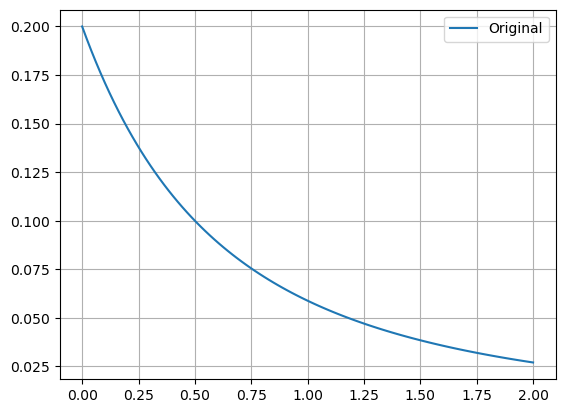

In [252]:
ts = np.linspace(0, 2, 100)
plt.plot(ts, g(f(ts)), label="Original")
plt.legend();plt.grid();plt.show()

In [128]:
isinstance(x, Constant)

False

In [86]:
#class operator:



class function:
    #def __init__(self):        
    def __add__(self, other):
        return add_operator(self, other)
        
    def __mul__(self, other):
        return mul_operator(self, other)
    
    def __truediv__(self, other):
        return div_operator(self, other)
    
    def __pow__(self, other):
        if isinstance(other, Constant):
            return pow_operator(self, other.c)
        elif isinstance(other, int):
            return pow_operator(self, other)
        else:
            raise ValueError("Power must be a Constant or int.")
        
    def __call__(self, x):
        pass
    
    def derivative(self):
        pass


class Constant(function):
    def __init__(self, c):
        self.c = c
    def __call__(self, x):
        return self.c
    
    def derivative(self):
        return Constant(0.0) 

class X(function):
    def __call__(self, x):
        return x
    def derivative(self):
        return Constant(1.0) 
    
class Act(function):
    def __init__(self, k, n):
        self.k = k
        self.n = Constant(n)
        
    def __call__(self, x):
        if x == 0.0:
            return 0.0
        return 1.0 / (1 + (self.k/(x ))**self.n.c)
    
    def derivative(self):
        return Constant(self.n.c)*(X() ** -1)*Act(self.k, self.n.c)*Inh(self.k, self.n.c)
        #return Act_prime(self.k, self.n.c)
    
class Inh(function):
    def __init__(self, k, n):
        self.k = k
        self.n = Constant(n)
        
    def __call__(self, x):
        return 1.0 / (1 + (x/(self.k + 1e-40))**self.n.c)  
    
    def derivative(self):
        return Constant(-self.n.c)*(X() ** -1)*Act(self.k, self.n.c)*Inh(self.k, self.n.c)
        #return Inh_prime(self.k, self.n.c)
    
class Act_prime(function):
    def __init__(self, k, n):
        self.k = k
        self.n = Constant(n)
        
    def __call__(self, x):
        if x == 0.0:
            return 0.0
        return (-self.n.c/x)*(1.0 / (1 + (self.k/(x ))**self.n.c))*(1.0 / (1 + (x/(self.k ))**self.n.c))
    
    def derivative(self):
        return Constant(-self.n.c)*(X() ** -1)*Act(self.k, self.n.c)*Inh(self.k, self.n.c)
    
class Inh_prime(function):
    def __init__(self, k, n):
        self.k = k
        self.n = Constant(n)
        
    def __call__(self, x):
        if x == 0.0:
            return 0.0
        return (self.n.c/x)*(1.0 / (1 + (self.k/(x ))**self.n.c))*(1.0 / (1 + (x/(self.k ))**self.n.c))
    
    def derivative(self):
        return Constant(self.n.c)*(X() ** -1)*Act(self.k, self.n.c)*Inh(self.k, self.n.c)    
    
class binary_operator(function):
    def __init__(self, left, right):        
        self.left = left
        self.right = right
        
    def __call__(self, x):
        pass
    
    def derivative(self):
        pass
    
class add_operator(binary_operator):
    def __init__(self, left, right):
        self.left = left
        self.right = right

    def __call__(self, x):
        return self.left(x) + self.right(x)
    
    def derivative(self):
        return self.left.derivative() + self.right.derivative()

class mul_operator(binary_operator):
    def __init__(self, left, right):
        self.left = left
        self.right = right

    def __call__(self, x):
        return self.left(x) * self.right(x)
    
    def derivative(self):
        if isinstance(self.left, Constant) and isinstance(self.right, Constant):
            return Constant(0.0)
        elif isinstance(self.left, Constant):
            return self.left*self.right.derivative()        
        elif isinstance(self.right, Constant):
            return self.left.derivative() * self.right
        else:
            return self.left.derivative() * self.right + self.left*self.right.derivative()

class div_operator(binary_operator):
    def __init__(self, left, right):
        self.left = left
        self.right = right
        
    def __call__(self, x):
        return self.left(x) / (self.right(x) + 1e-40)
    
    def derivative(self):
        return (self.left.derivative() / (self.right(x) + 1e-40) 
                - (self.left*self.right.derivative())/(self.right(x) + 1e-40) )

class pow_operator(binary_operator):
    def __init__(self, left, p):
        self.left = left
        self.p = p
        
    def __call__(self, x):
        
        return (self.left(x)+ 1e-40) ** self.p
    
    def derivative(self):
        if self.p != 1:
            return Constant(self.p) * pow_operator(self.left, self.p-1) * self.left.derivative()
        else:
            return self.left.derivative()


class function_compund(function):
    def __init__(self, left, right,op):
        self.left = left
        self.right = right
        self.op = op

In [229]:
G1 = lambda x: 1/(1+(1.0/(x+1e-40))**2)
g1 = lambda x: 1/(1+(x/1.0)**2)

H1 = Act(k=1,n=2)
h1 = Inh(k=1,n=2)
x = X()

n_1 = Constant(2)
minus = Constant(-1)
H1_p_h1 = H1 + h1
H1_t_h1 = H1 * h1
H1_d_h1 = H1 / h1

In [230]:
H1(1), h1(1), H1_p_h1(1), H1_t_h1(1), H1_d_h1(1), (minus * x + H1_d_h1)(1) 

(0.5, 0.5, 1.0, 0.25, 1.0, 0.0)

In [231]:
minus.derivative()(0), x.derivative()(0), x.derivative().derivative()(0)

(0.0, 1.0, 0.0)

In [232]:
(X() ** -1).derivative()(2)

-0.25

In [233]:
(x ** Constant(1)).derivative()(3)

1.0

In [245]:
val = 0.0
print(H1(val), G1(val), h1(val), g1(val))
H1.derivative()(val), jax.grad(G1)(val), h1.derivative()(val), jax.grad(g1)(val)

0.0 1e-80 1.0 1.0


(0.0,
 Array(nan, dtype=float32, weak_type=True),
 -0.0,
 Array(-0., dtype=float32, weak_type=True))

In [246]:
(H1.derivative().derivative()(val), 
 jax.grad(jax.grad(G1))(val), 
 h1.derivative().derivative()(val), 
 jax.grad(jax.grad(g1))(val))

(0.0,
 Array(nan, dtype=float32, weak_type=True),
 0.0,
 Array(-2., dtype=float32, weak_type=True))

In [237]:
n_max = 5
derivative_funcs = [H1]

for i in range(n_max):
    derivative_funcs.append(derivative_funcs[-1].derivative())


In [238]:
H1(0)

0.0

In [239]:
[f(0.0) for f in derivative_funcs]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

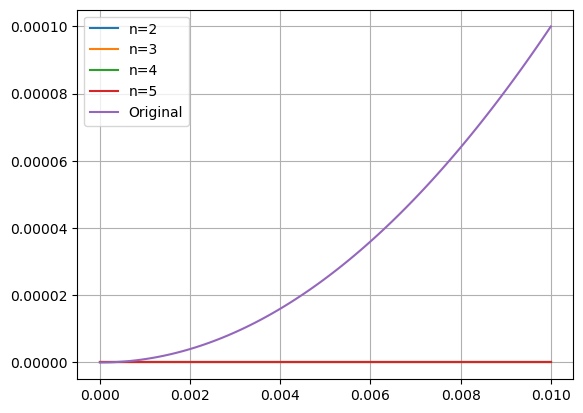

In [242]:
a_s = [0.000000, 1.0] + [0.0]*n_max

ts = np.linspace(0, .01, 100)

for n in range(2, n_max+1):
    f_comp = composition(n, a_s[:n+1], derivative_funcs[:n+1])
    plt.plot(ts, [f_comp(t) for t in ts], label=f"n={n}")
    
plt.plot(ts, [H1(t) for t in ts], label="Original")
plt.legend();plt.grid();plt.show()


In [9]:
def partitions(n , I=1):
    """Enumerate all the integer parition of n"""
    yield (n,)
    for i in range(I, n//2 + 1):
        for p in partitions(n-i, i):
            yield (i,) + p
            
def convolution(m):
    if m == 0:
        def C_0(a_s, f_derivatives):
            assert len(a_s) == len(f_derivatives)
            return f_derivatives[0]
        return C_0
    ##############################
    parts = list(partitions(m))
    # Find the degeneracy of the integer per part
    degeneracies = [Counter(p) for p in parts]
    #print(degeneracies)
    # indices
    indices_seq = [[k for k in d.keys()]
                      for d in degeneracies]
    #print(indices_seq)
    # counts of degeneracies per part: j_1, j_2, ..., j_i 
    degeneracies_counts = [[v for v in d.values()]
                              for d in degeneracies]
    degeneracies_totals = [sum(d.values()) for d in degeneracies]
    #print(degeneracies_counts)
    #print(degeneracies_totals)
    # decreasing sequence of m, m-j_1, ..., m-j_1-...-j_{i-1}  
    dec_seq = [[totals-sum(p[:i]) for i,v in enumerate(p)]
                   for p, totals in zip(degeneracies_counts,degeneracies_totals)]
    #print(dec_seq)
    # Find combinations per  part   
    comb_m_seq = [[special.comb(s, j, exact=True) for s,j in zip(seq, counts)]
                for seq, counts in zip(dec_seq, degeneracies_counts)]
    #print(comb_m_seq)
    comb_m_seq = [np.prod(p) for p in comb_m_seq]
    #print(comb_m_seq)
    # Combine all to make ( binomial coefs,derivative_order , list_of_indice, degenerecies )
    D_m_seq = [(bino_coef, derivative_order, indices, term_deg)
                for bino_coef, derivative_order , indices, term_deg in zip(comb_m_seq, degeneracies_totals, indices_seq, degeneracies_counts)]
    #print(D_m_seq)
    #m_factorial = sp.special.factorial(m, exact=True)
    
    def C_m(a_s, f_derivatives):
        assert(len(a_s) == len(f_derivatives))
        ret = [((bino_coef *  np.prod([ a_s[i]**j for i , j in zip(indices, term_deg)]))
                   * f_derivatives[d_order] / special.factorial(d_order, exact=True))                                
                 for bino_coef, d_order , indices, term_deg in D_m_seq]
        return ret
    
    return C_m


def composition(n, a_s, derivatives):
    #assert n+1 == len(derivative_funcs)
    #assert n+1 == len(a_s)    
    assert len(a_s) == len(derivatives)
    C_s = [convolution(i) for i in range(n+1)]
    coefs = [np.sum(C_s[i](a_s[:i+1], derivatives[:i+1])) for i in range(n+1)]
    def power_series(t):
        return np.sum([ (t ** i)*c for i, c in zip(range(n+1),coefs)])
    return power_series

In [742]:
def binomial_coef(n):
    """Finds all the Binomial coefiecents of n."""
    val = 1
    yield val
    if n == 1:
        yield val
        return
    for i in range(n):
        val *= (n-i)
        val //= (i+1)
        yield val
        
def mul_derivatives(n, f1s, f2s):
    """Finds the nth derivatives of g(x) = f1(x)f2(x)
    
       args:
    
       n:   order of the derivatives.
       f1s: An array of previous derivatives of the first function
            (f1, f1', f1'', ..., f1^(n-1)).
       f2s: An array of previous derivatives of the second function
            (f2, f2', f2'', ..., f2^(n-1)).
    """
    assert n+1 == len(f1s)
    assert n+1 == len(f2s)
    
    return np.sum([(c * v1) * v2 for c, v1, v2 in zip(binomial_coef(n), f1s, f2s[::-1]) ])
    
    
    
def Hill_derivatives(alpha, k, n, x0):
    def H(x):
        if x == 0:
            return 0.0
        return 1.0 / (1.0 + (k/x)**alpha)
    
    def h(x):        
        return 1.0 / (1.0 + (x/k)**alpha)
        
    def f_der(x, order):
        if x == 0:
            return 0.0
        
        ret = ((-1)**order) * alpha / (x ** (1+order))
        ret *= np.prod(range(1, order+1))
        return ret
    
    hs = [h(x0)]
    Hs = [H(x0)]
    fs = [f_der(x0, 0)]
    hsHs = [h(x0) * H(x0)]
    
    Hs += [fs[0] * hsHs[0]]
    hs += [-Hs[-1]]    
    hsHs += [mul_derivatives(1, hs, Hs)]
    fs += [f_der(x0, 1)]
                
    for i in range(2, n):  
        Hs += [mul_derivatives(i-1, fs, hsHs)]
        hs += [-Hs[-1]]        
        
        hsHs += [mul_derivatives(i, hs, Hs)]
        fs += [f_der(x0, i)]
        
        
        
    return (hs, Hs, hsHs)
        
    

In [657]:
import jax.numpy as jnp

alpha = 2
k=1.0

def H(x):
    if x == 0.0:
        return 0.0
    return 1.0 / (1.0 + (k/x)**alpha)

def h(x):        
    return 1.0 / (1.0 + (x/k)**alpha)

    
def f(x):
    #if x == 0:
    #    return 0.0
    return alpha/x

def f_der(x, order):
    ret = ((-1)**order) * alpha / (x ** (1+order))
    #for i in range(1, order+1):
    #    ret *= i
    ret *= np.prod(range(1, order+1))
    return ret


# derivative_funcs = [jit(g)]
# for i in range(n_max):
#     derivative_fs.append(jit(jax.grad(derivative_fs[-1])))
    

In [658]:
x0 = 0.1
n_max = 100
hs, Hs, hsHs = Hill_derivatives(alpha, k, n_max, x0)  

23 (1.0849962203926791e+40, 1124000727777607680000)



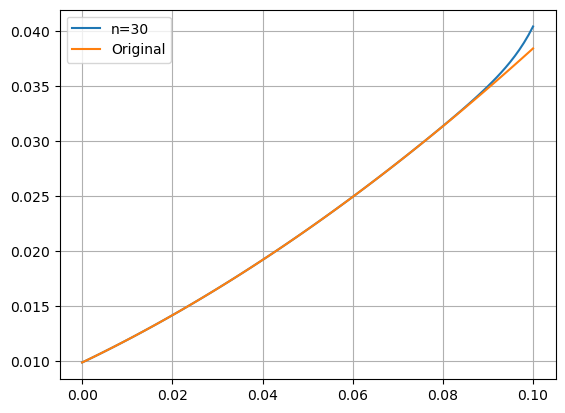

23 (1.0849962203926791e+40, 1124000727777607680000)



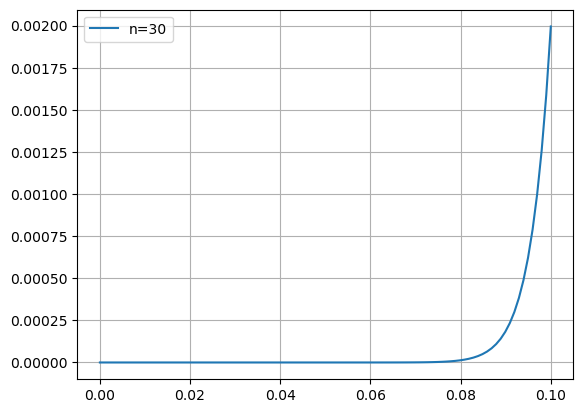

In [659]:
a_s = [0.1, 1.0] + [0.0]*100
identity = lambda x: .1 + x

ts = np.linspace(0, .1, 100)
n_range = range(30,31)
for n in n_range:    
    f_comp = composition(n, a_s[:n+1], Hs[:n+1])
    plt.plot(ts, [f_comp(t) for t in ts], label=f"n={n}")
    
plt.plot(ts, [H(identity(t)) for t in ts], label="Original")
plt.legend();plt.grid();plt.show()

for n in n_range:    
    f_comp = composition(n, a_s[:n+1], Hs[:n+1])
    plt.plot(ts, [f_comp(t)- H(identity(t)) for t in ts] , label=f"n={n}")
    
plt.legend();plt.grid();plt.show()


In [24]:
Hs

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [740]:
x0 = 10
hs, Hs, hsHs = Hill_derivatives(alpha, k, n_max, x0)
H1 = Act(k=k,n=alpha)    

In [ ]:
H1 = Act(k=k,n=alpha) 
h1 = Inh(k=k,n=alpha) 

for i, v1 in enumerate(Hs):
    
    print(i, Hs[i], H1(x0), hs[i], h1(x0))    
    print()
    #print(i, hsHs[i], derivative_funcs[i](x0))
    H1 = H1.derivative()
    h1 = h1.derivative()

In [98]:
factorial = lambda i: np.prod(range(1,i+1))
factorial(3)

6

In [99]:
def Taylor(ders):
    factorial = lambda i: np.prod(range(1,i+1))
    def f(x, a=0):
        return np.sum([ (d/factorial(i)) * (x-a)**i for i,d in enumerate(ders)])
    
    return f

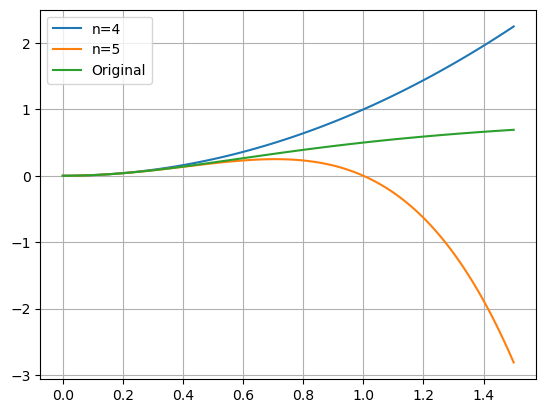

In [128]:
ts = np.linspace(0, 1.5, 100)
n_range = range(4,6)

alpha = 2
k=1.0

def H(x):
    if x == 0.0:
        return 0.0
    return 1.0 / (1.0 + (k/x)**alpha)

def h(x):        
    return 1.0 / (1.0 + (x/k)**alpha)

x0=0.0001
for n in n_range:
    _, ders, _ = Hill_derivatives(alpha, k, n, x0)
    f = Taylor(ders)
    plt.plot(ts, [f(t, x0) for t in ts], label=f"n={n}")
    
plt.plot(ts, [H(t) for t in ts], label="Original")
plt.legend();plt.grid();plt.show()

In [743]:
def partitions(n , I=1):
    """Enumerate all the integer parition of n"""
    yield (n,)
    for i in range(I, n//2 + 1):
        for p in partitions(n-i, i):
            yield (i,) + p
            
def convolution(m):
    if m == 0:
        def C_0(a_s, f_derivatives):
            assert len(a_s) == len(f_derivatives)
            return f_derivatives[0]
        return C_0
    ##############################
    parts = list(partitions(m))
    # Find the degeneracy of the integer per part
    degeneracies = [Counter(p) for p in parts]
    #print(degeneracies)
    # indices
    indices_seq = [[k for k in d.keys()]
                      for d in degeneracies]
    #print(indices_seq)
    # counts of degeneracies per part: j_1, j_2, ..., j_i 
    degeneracies_counts = [[v for v in d.values()]
                              for d in degeneracies]
    degeneracies_totals = [sum(d.values()) for d in degeneracies]
    #print(degeneracies_counts)
    #print(degeneracies_totals)
    # decreasing sequence of m, m-j_1, ..., m-j_1-...-j_{i-1}  
    dec_seq = [[totals-sum(p[:i]) for i,v in enumerate(p)]
                   for p, totals in zip(degeneracies_counts,degeneracies_totals)]
    #print(dec_seq)
    # Find combinations per  part   
    comb_m_seq = [[special.comb(s, j, exact=True) for s,j in zip(seq, counts)]
                for seq, counts in zip(dec_seq, degeneracies_counts)]
    #print(comb_m_seq)
    comb_m_seq = [np.prod(p) for p in comb_m_seq]
    #print(comb_m_seq)
    # Combine all to make ( binomial coefs,derivative_order , list_of_indice, degenerecies )
    D_m_seq = [(bino_coef, derivative_order, indices, term_deg)
                for bino_coef, derivative_order , indices, term_deg in zip(comb_m_seq, degeneracies_totals, indices_seq, degeneracies_counts)]
    #print(D_m_seq)
    #m_factorial = sp.special.factorial(m, exact=True)
    
    def C_m(a_s, f_derivatives):
#         if len(a_s) == 23:# or len(a_s) == 22 or len(a_s) == 23:
#             print(len(a_s), ([
#                  (d_order, f_derivatives[d_order] , special.factorial(d_order, exact=True),
#                   f_derivatives[d_order]/special.factorial(d_order, exact=True)) 
#                  for bino_coef, d_order , indices, term_deg in D_m_seq][21]))
#             print([ d for d in degeneracies if sum(d.values()) == 22])
#             print()
        assert(len(a_s) == len(f_derivatives))
        ret = [( (bino_coef *  np.prod([ a_s[i]**j for i , j in zip(indices, term_deg)]))
               * (f_derivatives[d_order] / special.factorial(d_order, exact=True))
               )                                
                 for bino_coef, d_order , indices, term_deg in D_m_seq]
        return ret
    
    return C_m


In [884]:
def auto_reg(n, b, mu, V, k, alpha, x0):
    factorial = lambda i: np.prod(range(1,i+1))
    hs, Hs, _ = Hill_derivatives(alpha, k, n+1, x0) 
    #Hs, hs, _ = Hill_derivatives(alpha, k, n+1, x0) 
    Hs = np.array([0.0, -alpha ] + [0.0 for _ in range(n-1)])
    #print(Hs[20:])
    a_1 = b  + V * Hs[0] - mu *x0
    a_s = [x0, a_1]

    for i in range(1, n+1):        
        C_s = convolution(i) 
        #a_i = (1/(i+1)) * (V *np.sum(C_s(a_s, Hs[:i+1])) - mu * a_s[-1])
        a_i = (V/(i+1)) * np.sum(C_s(a_s, Hs[:i+1])) - (mu/(i+1)) * a_s[-1]
        a_s.append(a_i)
        
    def power_series(t):
        def rec_pow(x, n, c):
            ret = c
            for i in range(n):
                #print(n, x, ret)
                ret *= x
            #print()
            return ret
        
        return np.sum([ rec_pow(t, i, c) for i, c in zip(range(n+1), a_s)])
        #return np.sum([ (t ** i)*c for i, c in zip(range(n+1), a_s)])
        
    return a_s, power_series
    

In [890]:
Hill_derivatives(alpha, k, 10+1, 0.0001)

([0.9999999999999984,
  -6.399999999999979e-11,
  -1.919999999999986e-06,
  -0.03839999999999916,
  -383.9999999999566,
  1.7397105693817139e-06,
  0.052490234375,
  1120.0,
  14155776.0,
  -240518168576.0,
  -9007199254740992.0],
 [1.5999999999999974e-15,
  6.399999999999979e-11,
  1.919999999999986e-06,
  0.03839999999999916,
  383.9999999999566,
  -1.7397105693817139e-06,
  -0.052490234375,
  -1120.0,
  -14155776.0,
  240518168576.0,
  9007199254740992.0],
 [1.5999999999999948e-15,
  6.399999999999959e-11,
  1.919999999999972e-06,
  0.0383999999999983,
  383.9999999999136,
  -3.4600305693816364e-06,
  -0.10409983437499455,
  -2152.19199999967,
  -24477695.999983348,
  240518168576.67734,
  9007199254761890.0])

In [916]:
auto_reg(45+1, b, mu, V, k, alpha,  0.0001)

([0.0001,
  0.39982,
  -1.159478,
  2.2416574666666667,
  -3.2504033266666665,
  3.7704678589333334,
  -3.6447855969688883,
  3.019965208917079,
  -2.1894747764648823,
  1.4109948559440353,
  -0.8183770164475405,
  0.43150788139961227,
  -0.20856214267647924,
  0.09305080211719843,
  -0.038549618019982204,
  0.014905852301059785,
  -0.005403371459134172,
  0.0018435032037045999,
  -0.0005940176989714821,
  0.0001813317186333998,
  -5.258619840368594e-05,
  1.4523807178160877e-05,
  -3.82900371060605e-06,
  9.655748487615255e-07,
  -2.3334725511736867e-07,
  5.413656318722953e-08,
  -1.2076617941766588e-08,
  2.5942364467498593e-09,
  -5.373775496838994e-10,
  1.0747550993677988e-10,
  -2.0778598587777444e-11,
  3.88760876803578e-12,
  -7.046290892064851e-13,
  1.238439005272004e-13,
  -2.1126312442875362e-14,
  3.500931776247917e-15,
  -5.640390083954977e-16,
  8.841692564037532e-17,
  -1.3495214966162547e-17,
  2.0069806872754557e-18,
  -2.910121996549411e-19,
  4.1167579463381917e-20

In [924]:
b = 0.4
mu = 1.8
V = 1.0
k = 1.0/4.0
alpha = 4

def H(x):
    if x == 0.0:
        return 0.0
    return 1.0 / (1.0 + (k/x)**alpha)

x0 = 0.0001
n = 45
a_s, sol = auto_reg(n, b, mu, V, k, alpha, x0)

In [898]:
sol(10)

2.17445796481561e+20

In [925]:
from scipy.integrate import odeint
def rhs(x, t):
    return b - mu * x + V * H(x)

ts = np.linspace(0, 3.0, 500)
sol2 = odeint(rhs, [x0], ts)

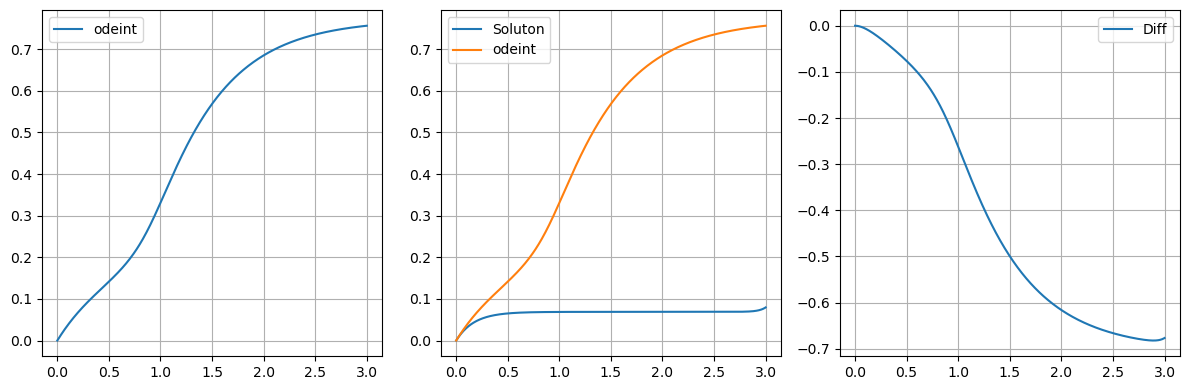

In [926]:
_ = plt.figure(figsize=(12,4))
plt.subplot(131)
plt.plot(ts, sol2, label="odeint")
plt.legend();plt.grid();
plt.subplot(132)
plt.plot(ts, [sol(t) for t in ts], label="Soluton")
plt.plot(ts, sol2, label="odeint")
plt.legend();plt.grid();
plt.subplot(133)
plt.plot(ts, [sol(t) for t in ts]-sol2[:, 0], label="Diff")
plt.legend();plt.grid();plt.tight_layout()
plt.show()

In [921]:
a_s

[0.0001,
 0.39982,
 -1.159478,
 2.2416574666666667,
 -3.2504033266666665,
 3.7704678589333334,
 -3.6447855969688883,
 3.019965208917079,
 -2.1894747764648823,
 1.4109948559440353,
 -0.8183770164475405,
 0.43150788139961227,
 -0.20856214267647924,
 0.09305080211719843,
 -0.038549618019982204,
 0.014905852301059785,
 -0.005403371459134172,
 0.0018435032037045999,
 -0.0005940176989714821,
 0.0001813317186333998,
 -5.258619840368594e-05,
 1.4523807178160877e-05,
 -3.82900371060605e-06,
 9.655748487615255e-07,
 -2.3334725511736867e-07,
 5.413656318722953e-08,
 -1.2076617941766588e-08,
 2.5942364467498593e-09,
 -5.373775496838994e-10,
 1.0747550993677988e-10,
 -2.0778598587777444e-11,
 3.88760876803578e-12,
 -7.046290892064851e-13,
 1.238439005272004e-13,
 -2.1126312442875362e-14,
 3.500931776247917e-15,
 -5.640390083954977e-16,
 8.841692564037532e-17,
 -1.3495214966162547e-17,
 2.0069806872754557e-18,
 -2.910121996549411e-19,
 4.1167579463381917e-20,
 -5.68504668780036e-21,
 7.6682025091260

In [763]:
t = 1.5
np.cumsum([ (t ** i)*c for i, c in zip(range(n+1), a_s)])

array([ 1.00000000e+00,  1.90000000e+00,  2.71000000e+00,  2.79100000e+00,
        1.73395000e+00,  6.20767000e-01,  1.81224460e+00,  5.52012814e+00,
        5.96512140e+00, -3.60538108e+00, -1.40392531e+01,  3.87884274e+00,
        5.29051369e+01,  4.58580556e+01, -1.16019062e+02, -2.55382896e+02,
        1.32860565e+02,  9.86938347e+02,  5.55518327e+02, -2.77435012e+03,
       -4.71447497e+03,  4.75463614e+03,  2.12556563e+04,  5.26012455e+03,
       -6.93277456e+04, -9.03806336e+04,  1.52666229e+05,  4.81756171e+05,
       -4.52481545e+04, -1.78286103e+06, -1.70355303e+06,  4.68268240e+06,
        1.11240242e+07, -5.39292126e+06, -4.64313531e+07, -2.92084084e+07])